This notebook is to run the simplified field scale desert biocrust model (dfDBM), published on the Science of Total Environment

## Unravelling the main mechanism responsible for the nocturnal CO$_2$ uptake by dryland soils

Minsu Kim$^{1,*}$, Clément Lopez-Canfin$^{2,3,*}$, Roberto Lázaro$^{4}$, Enrique P. Sánchez-Cañete$^{2,5}$, and Bettina Weber$^{1,6}$

$^{1}$ Institute of Biology, University of Graz, Graz, Austria 

$^{2}$ Department of Applied Physics, University of Granada (UGR), Granada, Spain

$^{3}$ Department of Plant and Soil Sciences, University of Delaware, Newark, DE, USA

$^{4}$ Department of Desertification and Geo-Ecology, Experimental Station of Arid Zones (EEZA-CSIC), Almería, Spain

$^{5}$ Inter-University Institute for Earth System Research (IISTA-CEAMA), Granada, Spain

$^{6}$ Multiphase Chemistry, Max Planck Institute for Chemistry, Mainz, Germany

Corresponding author: Minsu Kim

email: minsu.kim@uni-graz.at

OrcID: https://orcid.org/0000-0002-3942-3743


In [18]:
# import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from scipy.integrate import solve_ivp
import os
from main_sfDBM import * # load functions used in this script

sfDBM_SD_winter_with_reac_respif_1.0000
Day 0 starts
0.0
24.0
48.0
72.0
96.0


C:\Users\kimmi\AppData\Local\anaconda3\lib\site-packages\scipy\integrate\_ivp\common.py:338: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]
C:\Users\kimmi\AppData\Local\anaconda3\lib\site-packages\scipy\integrate\_ivp\common.py:360: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE


120.0
144.0
168.0
192.0
216.0
240.0
264.0
288.0
312.0
336.0
360.0
384.0
408.0
432.0
456.0
480.0
504.0
528.0
552.0
576.0
600.0
624.0
648.0
672.0
696.0
720.0
744.0
The end
file saved!
SD (winter)_with_respif_1.0000


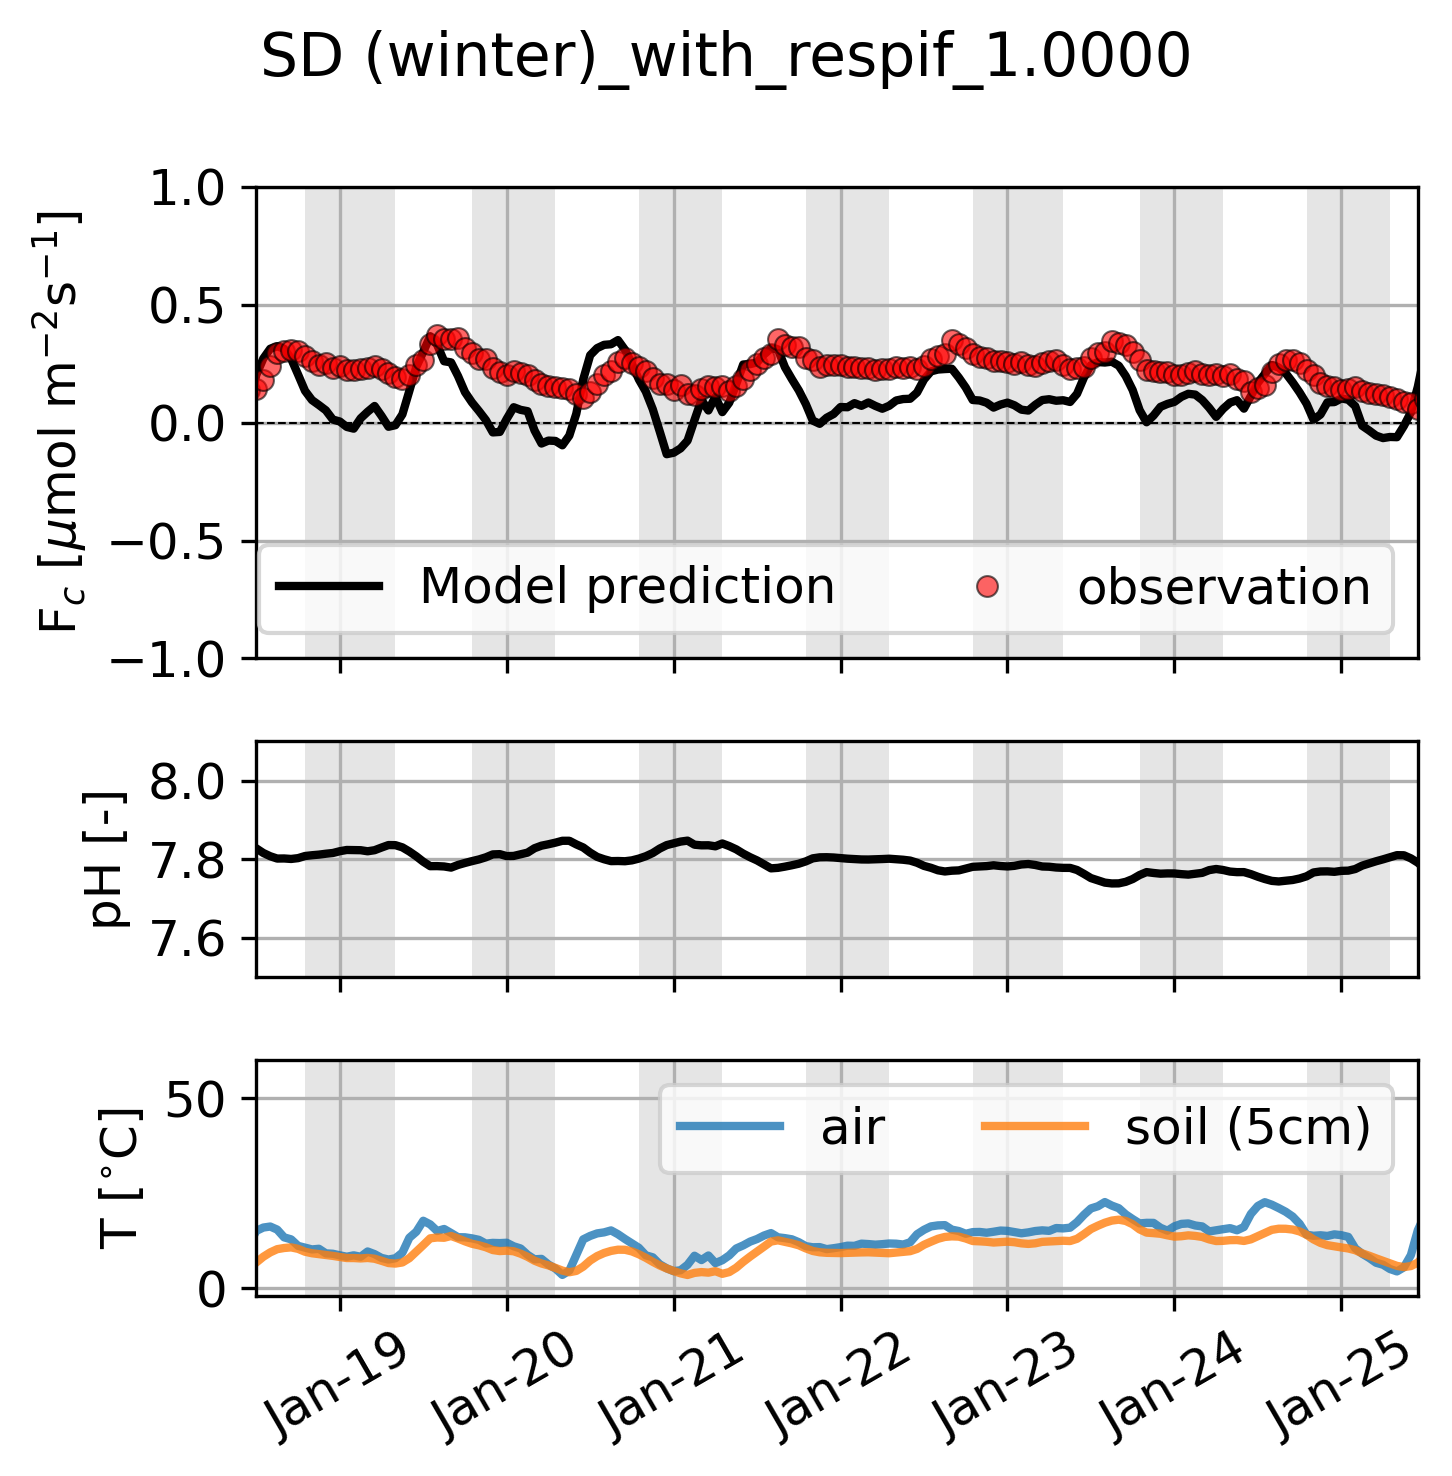

In [20]:
# Excuting the main function
PATH = "."
crust_name = 'SD' # ['PD', 'MC', 'SD']
realTinput = 'winter' #['winter', 'summer']
respif = 1
filesave = True
saveFigures = True
plotFigures = True

fname_target = 'sfDBM_'+crust_name+'_'+realTinput+'_with_reac_respif_%.4f'%respif 
print(fname_target)

# Load pre-saved soil property data
df_soil_r, df_obs, averageT = load_field_data_soil_properties(PATH, crust_name, realTinput)

# run a main code of soil-gas exchange model (the simplified field DBM)
timeLine,effluxList, timeConcDist = main_tabernas_biocrusts(PATH, crust_name, realTinput,respif, fname_target, filesave=filesave, plotFigures=plotFigures)

if plotFigures:    
    if respif == 0:
        figure_title = crust_name+' ('+realTinput+')'
    else:
        figure_title = crust_name+' ('+realTinput+')'+'_with_respif_%.4f'%respif 
        print(figure_title)
    
    plot_results(PATH, figure_title,df_obs,effluxList,timeConcDist,timeLine,saveFigures=saveFigures) 